In [1]:
import pandas as pd

from tqdm import tqdm
from xml.etree import ElementTree as ET
from networkx import Graph, DiGraph
import numpy as np
# import glasbey
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
import tifffile
from pathlib import Path

track_path = Path(r"D:\FeedbackControl\data\cellmovementvis")
savepath = Path(
    r"G:\.shortcut-targets-by-id\1mjQpOyIBmhwFST1jB0FWKJhKOiVOMeb8\2025-03-24 Harrison feedback control\figure 2")
import matplotlib as mpl

mpl.rc("axes", facecolor="#ffffff00", grid=False, edgecolor="k", labelcolor="k")
mpl.rc("figure", facecolor="#00000000", dpi=100)
mpl.rc("axes.spines", top=False, right=False, )
mpl.rc("xtick", color="k", bottom=True)
mpl.rc("ytick", color="k", left=True)
mpl.rc("legend", fontsize="small")

In [2]:
stem = "circle125.new.00"

arr = tifffile.imread(track_path / f"{stem}_patterns.tif")
tracks = pd.read_csv(track_path / f"{stem}_tracks.csv")

In [4]:
print(tracks.columns)

Index(['label', 'area', 'px_y', 'px_x', 'frame', 'tree_id', 'track_id'], dtype='object')


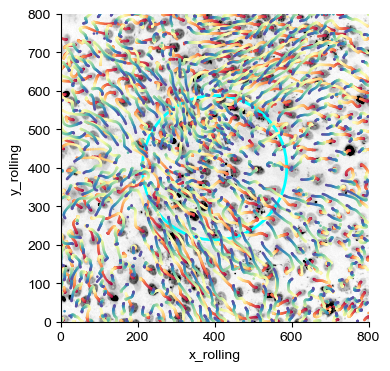

In [29]:
from matplotlib.patches import Circle


ss = tracks[tracks["px_x"].between(400, 1200) & tracks["px_y"].between(400, 1200)].copy()
ss = ss.sort_values("frame")
ss["x_rolling"] = ss.groupby("track_id").rolling(window=5, min_periods=1)["px_x"].mean().reset_index(level=0, drop=True) - 400
ss["y_rolling"] = ss.groupby("track_id").rolling(window=5, min_periods=1)["px_y"].mean().reset_index(level=0, drop=True) - 400
ss = ss[ss["frame"] < 12*6]

fig, ax = plt.subplots(1, 1, figsize=(4, 4))

plt.xlim(0, 800)
plt.ylim(0, 800)
plt.gca().set_aspect('equal')
circle = Circle((400, 400), 187.5, color="cyan", fill=False, lw=2)

plt.imshow(arr[0, 0, 400:1200, 400:1200], cmap="binary", vmin=500, vmax=3000)
plt.gca().add_patch(circle)
sns.scatterplot(ss, x="x_rolling", y="y_rolling", hue="frame", legend=False, palette="Spectral", linewidth=0.0, s=3.5)


plt.savefig(savepath / "circle_movement_all.pdf")
plt.show()

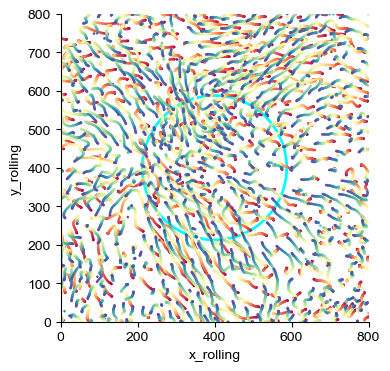

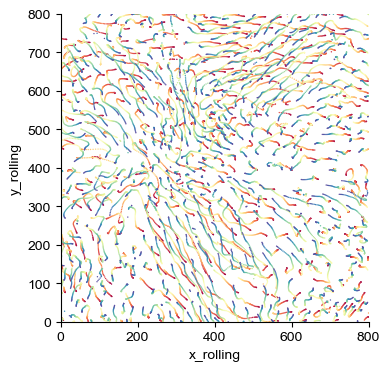

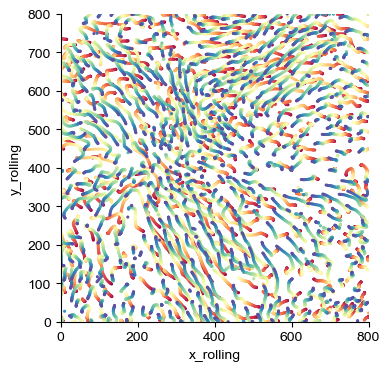

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

plt.xlim(0, 800)
plt.ylim(0, 800)
plt.gca().set_aspect('equal')
circle = Circle((400, 400), 187.5, color="cyan", fill=False, lw=2)

# plt.imshow(arr[0, 0, 400:1200, 400:1200], cmap="gray", vmin=0, vmax=3000)
plt.gca().add_patch(circle)
sns.scatterplot(ss, x="x_rolling", y="y_rolling", hue="frame", legend=False, palette="Spectral", linewidth=0.0, s=3.5)


plt.savefig(savepath / "circle_movement_no_img.pdf")
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(4, 4))

plt.xlim(0, 800)
plt.ylim(0, 800)
plt.gca().set_aspect('equal')
circle = Circle((400, 400), 187.5, color="cyan", fill=False, lw=2)

# plt.imshow(arr[0, 0, 400:1200, 400:1200], cmap="gray", vmin=0, vmax=3000)
# plt.gca().add_patch(circle)
sns.scatterplot(ss, x="x_rolling", y="y_rolling", hue="frame", legend=False, palette="Spectral", linewidth=0.0, s=1.0)


plt.savefig(savepath / "circle_movement_just_lines_thin.pdf")
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(4, 4))

plt.xlim(0, 800)
plt.ylim(0, 800)
plt.gca().set_aspect('equal')
circle = Circle((400, 400), 187.5, color="cyan", fill=False, lw=2)

# plt.imshow(arr[0, 0, 400:1200, 400:1200], cmap="gray", vmin=0, vmax=3000)
# plt.gca().add_patch(circle)
sns.scatterplot(ss, x="x_rolling", y="y_rolling", hue="frame", legend=False, palette="Spectral", linewidth=0.0, s=5.0)


plt.savefig(savepath / "circle_movement_just_lines_thick.pdf")
plt.show()

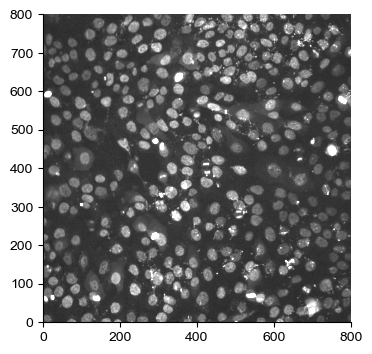

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

plt.xlim(0, 800)
plt.ylim(0, 800)
plt.gca().set_aspect('equal')
circle = Circle((400, 400), 187.5, color="cyan", fill=False, lw=2)

plt.imshow(arr[0, 0, 400:1200, 400:1200], cmap="gray", vmin=0, vmax=3000)
# plt.gca().add_patch(circle)
# sns.scatterplot(ss, x="x_rolling", y="y_rolling", hue="frame", legend=False, palette="Spectral", linewidth=0.0, s=5.0)


plt.savefig(savepath / "circle_movement_just_img.pdf")
plt.show()

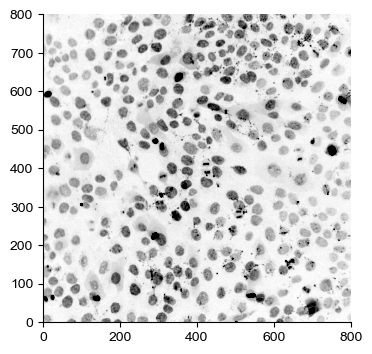

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

plt.xlim(0, 800)
plt.ylim(0, 800)
plt.gca().set_aspect('equal')
circle = Circle((400, 400), 187.5, color="cyan", fill=False, lw=2)

# plt.imshow(arr[0, 0, 400:1200, 400:1200], cmap="gray", vmin=0, vmax=3000)
plt.imshow(arr[0, 0, 400:1200, 400:1200], cmap="binary", vmin=500, vmax=3000)

# plt.gca().add_patch(circle)
# sns.scatterplot(ss, x="x_rolling", y="y_rolling", hue="frame", legend=False, palette="Spectral", linewidth=0.0, s=5.0)


plt.savefig(savepath / "circle_movement_just_img_inverted.pdf")
plt.show()

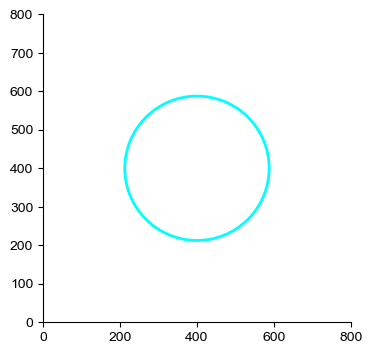

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

plt.xlim(0, 800)
plt.ylim(0, 800)
plt.gca().set_aspect('equal')
circle = Circle((400, 400), 187.5, color="cyan", fill=False, lw=2)

# plt.imshow(arr[0, 0, 400:1200, 400:1200], cmap="gray", vmin=0, vmax=3000)
# plt.imshow(arr[0, 0, 400:1200, 400:1200], cmap="binary", vmin=500, vmax=3000)

plt.gca().add_patch(circle)
# sns.scatterplot(ss, x="x_rolling", y="y_rolling", hue="frame", legend=False, palette="Spectral", linewidth=0.0, s=5.0)


plt.savefig(savepath / "circle_movement_just_circle.pdf")
plt.show()

In [38]:
tifffile.imwrite(savepath / "circle_movement_first_frame.tif", arr[0, 0, 400:1200, 400:1200], imagej=True)
tifffile.imwrite(savepath / "circle_movement_last_frame.tif", arr[12*6, 0, 400:1200, 400:1200], imagej=True)
tifffile.imwrite(savepath / "circle_movement_pattern_frame.tif", arr[12*6, 1, 400:1200, 400:1200], imagej=True)

Index(['label', 'area', 'px_y', 'px_x', 'frame', 'tree_id', 'track_id'], dtype='object')


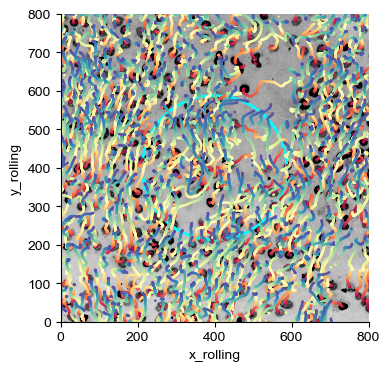

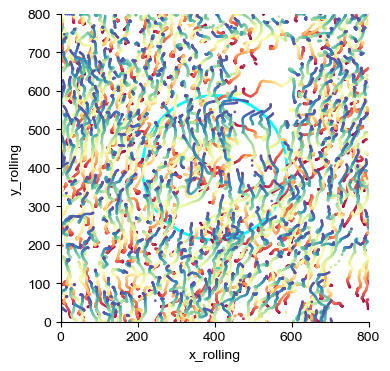

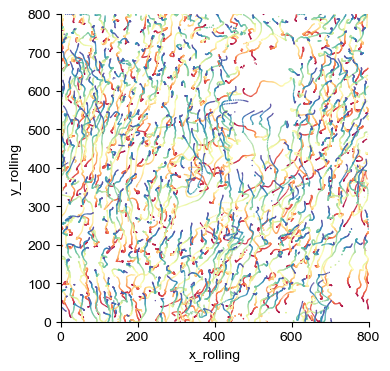

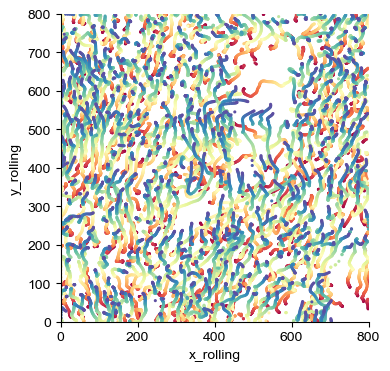

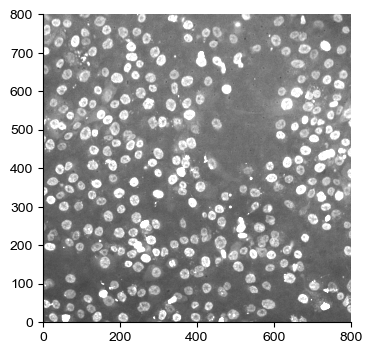

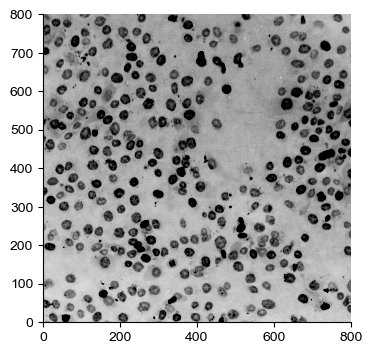

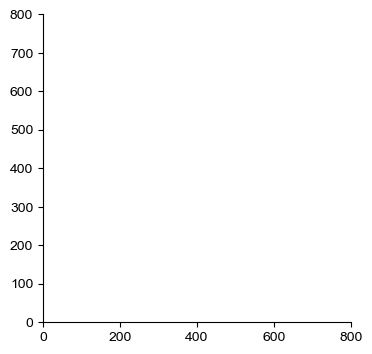

In [41]:
stem = "bar02.02"

arr = tifffile.imread(track_path / f"{stem}_patterns.tif")
tracks = pd.read_csv(track_path / f"{stem}_tracks.csv")
print(tracks.columns)
from matplotlib.patches import Rectangle

ss = tracks[tracks["px_x"].between(400, 1200) & tracks["px_y"].between(400, 1200)].copy()
ss = ss.sort_values("frame")
ss["x_rolling"] = ss.groupby("track_id").rolling(window=5, min_periods=1)["px_x"].mean().reset_index(level=0,
                                                                                                     drop=True) - 400
ss["y_rolling"] = ss.groupby("track_id").rolling(window=5, min_periods=1)["px_y"].mean().reset_index(level=0,
                                                                                                     drop=True) - 400
ss = ss[ss["frame"] < 12 * 12]

fig, ax = plt.subplots(1, 1, figsize=(4, 4))

plt.xlim(0, 800)
plt.ylim(0, 800)
plt.gca().set_aspect('equal')
circle = Circle((400, 400), 187.5, color="cyan", fill=False, lw=2)

plt.imshow(arr[0, 0, 400:1200, 400:1200], cmap="binary", vmin=500, vmax=3000)
plt.gca().add_patch(circle)
sns.scatterplot(ss, x="x_rolling", y="y_rolling", hue="frame", legend=False, palette="Spectral", linewidth=0.0, s=3.5)

plt.savefig(savepath / "bar_movement_all.pdf")
plt.show()
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

plt.xlim(0, 800)
plt.ylim(0, 800)
plt.gca().set_aspect('equal')
circle = Circle((400, 400), 187.5, color="cyan", fill=False, lw=2)

# plt.imshow(arr[0, 0, 400:1200, 400:1200], cmap="gray", vmin=0, vmax=3000)
plt.gca().add_patch(circle)
sns.scatterplot(ss, x="x_rolling", y="y_rolling", hue="frame", legend=False, palette="Spectral", linewidth=0.0, s=3.5)

plt.savefig(savepath / "bar_movement_no_img.pdf")
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(4, 4))

plt.xlim(0, 800)
plt.ylim(0, 800)
plt.gca().set_aspect('equal')
circle = Circle((400, 400), 187.5, color="cyan", fill=False, lw=2)

# plt.imshow(arr[0, 0, 400:1200, 400:1200], cmap="gray", vmin=0, vmax=3000)
# plt.gca().add_patch(circle)
sns.scatterplot(ss, x="x_rolling", y="y_rolling", hue="frame", legend=False, palette="Spectral", linewidth=0.0, s=1.0)

plt.savefig(savepath / "bar_movement_just_lines_thin.pdf")
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(4, 4))

plt.xlim(0, 800)
plt.ylim(0, 800)
plt.gca().set_aspect('equal')
circle = Circle((400, 400), 187.5, color="cyan", fill=False, lw=2)

# plt.imshow(arr[0, 0, 400:1200, 400:1200], cmap="gray", vmin=0, vmax=3000)
# plt.gca().add_patch(circle)
sns.scatterplot(ss, x="x_rolling", y="y_rolling", hue="frame", legend=False, palette="Spectral", linewidth=0.0, s=5.0)

plt.savefig(savepath / "bar_movement_just_lines_thick.pdf")
plt.show()
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

plt.xlim(0, 800)
plt.ylim(0, 800)
plt.gca().set_aspect('equal')
circle = Circle((400, 400), 187.5, color="cyan", fill=False, lw=2)

plt.imshow(arr[0, 0, 400:1200, 400:1200], cmap="gray", vmin=0, vmax=3000)
# plt.gca().add_patch(circle)
# sns.scatterplot(ss, x="x_rolling", y="y_rolling", hue="frame", legend=False, palette="Spectral", linewidth=0.0, s=5.0)


plt.savefig(savepath / "bar_movement_just_img.pdf")
plt.show()
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

plt.xlim(0, 800)
plt.ylim(0, 800)
plt.gca().set_aspect('equal')
circle = Circle((400, 400), 187.5, color="cyan", fill=False, lw=2)

# plt.imshow(arr[0, 0, 400:1200, 400:1200], cmap="gray", vmin=0, vmax=3000)
plt.imshow(arr[0, 0, 400:1200, 400:1200], cmap="binary", vmin=500, vmax=3000)

# plt.gca().add_patch(circle)
# sns.scatterplot(ss, x="x_rolling", y="y_rolling", hue="frame", legend=False, palette="Spectral", linewidth=0.0, s=5.0)


plt.savefig(savepath / "bar_movement_just_img_inverted.pdf")
plt.show()
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

plt.xlim(0, 800)
plt.ylim(0, 800)
plt.gca().set_aspect('equal')
circle = Circle((400, 400), 187.5, color="cyan", fill=False, lw=2)

# plt.imshow(arr[0, 0, 400:1200, 400:1200], cmap="gray", vmin=0, vmax=3000)
# plt.imshow(arr[0, 0, 400:1200, 400:1200], cmap="binary", vmin=500, vmax=3000)

# plt.gca().add_patch(circle)
# sns.scatterplot(ss, x="x_rolling", y="y_rolling", hue="frame", legend=False, palette="Spectral", linewidth=0.0, s=5.0)


plt.savefig(savepath / "bar_movement_just_circle.pdf")
plt.show()
tifffile.imwrite(savepath / "bar_movement_first_frame.tif", arr[0, 0, 400:1200, 400:1200], imagej=True)
tifffile.imwrite(savepath / "bar_movement_last_frame.tif", arr[12 * 6, 0, 400:1200, 400:1200], imagej=True)
tifffile.imwrite(savepath / "bar_movement_pattern_frame.tif", arr[1, 1, 400:1200, 400:1200], imagej=True)